номера 1.1 2.1

## Задача 1.1

[Дана выборка](https://drive.google.com/file/d/1cMqd315q_eR_x2oH5LsUTvVvAaODct-F/view?usp=sharing)

Выборка состоит из трех обзектов: X_train, Y_train, X_test

Y_train - изображение (пиксель кодируется черно-белой компонентой изображения), X_train - признаки, соответствующие этому изображению. (элемент X[i,j] соответствует набору признаков для пикселя Y[i,j]).

Требуется:

1. Провести отбор наиболее значимых признаков и построить регрессию X->Y
2. Проинтерпетировать признаки (каждый признак является функцией, возможно нелинейной, от значения пикселя)
3. Получить изображение по X_test (оцениваться будет качество полученного изображения. Ожидается, что регрессия на X_train, Y_train даст R^2>0.85).

In [1]:
import numpy as np
import pandas as pd

In [2]:
regression_x_test = np.load('regression/regression_x_test.npy')
regression_x_train = np.load('regression/regression_x_train.npy')
regression_y_train = np.load('regression/regression_y_train.npy')

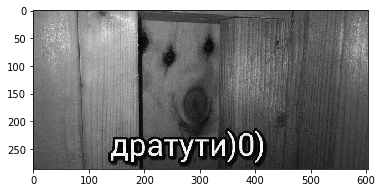

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(regression_y_train, cmap='gray')

In [4]:
print(f'x shape is {regression_x_train.shape}, y shape is {regression_y_train.shape}')

x shape is (286, 604, 35), y shape is (286, 604)


Получается, что по 35 признакам восстанавливается каждый пиксель.

In [5]:
feature_size = regression_x_train.shape[-1]

In [6]:
image_size = regression_y_train.shape

Посмотрим на данные

In [7]:
flattened_x_train = regression_x_train.reshape(-1, feature_size)
flattened_y_train = regression_y_train.reshape(-1)

flattened_x_test = regression_x_test.reshape(-1, feature_size)

In [8]:
train = pd.DataFrame(flattened_x_train)

In [9]:
train['y'] = flattened_y_train

In [10]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,y
0,0.496714,-0.138264,1.647689,2.288549,0.859431,-0.070241,0.473764,1.23023,0.624677,1.256353,...,45.607623,38.750030,147.605407,252.427767,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.658741
1,0.496714,-0.138264,1.647689,2.293655,-0.079660,-0.070241,0.473764,1.23023,0.629783,0.317261,...,17.831804,15.150602,57.711200,98.694957,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.671523
2,0.496714,-0.138264,1.647689,2.296195,1.243614,-0.070241,0.473764,1.23023,0.632323,1.640535,...,66.970839,56.901059,216.745739,370.668282,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.660211
3,0.496714,-0.138264,1.647689,2.296195,0.714635,-0.070241,0.473764,1.23023,0.632323,1.111556,...,39.459637,33.526459,127.707943,218.400068,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.662597
4,0.496714,-0.138264,1.647689,2.288549,0.422087,-0.070241,0.473764,1.23023,0.624677,0.819008,...,29.451076,25.022793,95.316041,163.004973,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.658827


In [11]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,y
count,172744.000000,172744.000000,172744.000000,172744.000000,172744.000000,172744.000000,172744.000000,172744.000000,172744.000000,172744.000000,...,172744.000000,172744.000000,172744.000000,172744.000000,1.727440e+05,1.727440e+05,1.727440e+05,1.727440e+05,1.727440e+05,172744.000000
mean,0.545034,0.345932,1.115172,2.280180,0.208698,-0.021921,0.957960,0.697714,0.616308,0.605619,...,29.091510,24.717291,94.152333,161.014855,-6.017066e-01,1.852278e+00,-1.349722e-02,-1.057711e+00,8.225449e-01,0.605166
std,0.214442,0.499752,0.498943,0.454953,0.531401,0.214442,0.499752,0.498943,0.454953,0.531401,...,29.814209,25.331324,96.491291,165.014829,6.583642e-14,8.059576e-12,2.094858e-14,2.326146e-12,2.776676e-12,0.116215
min,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.070241,0.473764,0.230230,-0.140842,0.162768,...,15.279169,12.981782,49.449801,84.566704,-6.017066e-01,1.852278e+00,-1.349722e-02,-1.057711e+00,8.225449e-01,0.358749
25%,0.496714,-0.138264,0.647689,2.068197,-0.123264,-0.070241,0.473764,0.230230,0.404325,0.273657,...,17.070970,14.504168,55.248823,94.483917,-6.017066e-01,1.852278e+00,-1.349722e-02,-1.057711e+00,8.225449e-01,0.527064
50%,0.496714,-0.138264,0.647689,2.286654,-0.028051,-0.070241,0.473764,0.230230,0.622782,0.368870,...,18.776245,15.953036,60.767808,103.922223,-6.017066e-01,1.852278e+00,-1.349722e-02,-1.057711e+00,8.225449e-01,0.598584
75%,0.496714,0.861736,1.647689,2.392652,0.386209,-0.070241,1.473764,1.230230,0.728780,0.783130,...,28.413168,24.140945,91.956936,157.260390,-6.017066e-01,1.852278e+00,-1.349722e-02,-1.057711e+00,8.225449e-01,0.671619
max,1.496714,0.861736,1.647689,6.026687,4.239442,0.929759,1.473764,1.230230,4.362815,4.636364,...,1339.546129,1138.131074,4335.333396,7414.081558,-6.017066e-01,1.852278e+00,-1.349722e-02,-1.057711e+00,8.225449e-01,1.000000


In [12]:
unary = []
binary = []
others = []
for column in train.columns:
    print(column, end=' ')
    l = len(train[column].unique())
    print(l)
    if l == 1:
        unary.append(column)
    elif l == 2:
        binary.append(column)
    else:
        others.append(column)

0 2
1 2
2 2
3 98899
4 100611
5 2
6 2
7 2
8 98899
9 100611
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 98899
23 98899
24 98899
25 98899
26 100611
27 100611
28 100611
29 100611
30 1
31 1
32 1
33 1
34 1
y 172430


Можем выкинуть последние 5 признаков

In [13]:
train.drop(labels=unary, axis='columns', inplace=True)

Видим, что есть бинарные признаки. На всякий случай, приведем их к виде 0-1

In [14]:
from collections import defaultdict
transform = defaultdict(dict)
for column in binary:
    values = train[column].unique()
    transform[column] = {v:i for i, v in enumerate(values)}

In [15]:
transform

defaultdict(dict,
            {0: {0.4967141530112327: 0, 1.4967141530112327: 1},
             1: {-0.13826430117118466: 0, 0.8617356988288154: 1},
             2: {1.6476885381006925: 0, 0.6476885381006925: 1},
             5: {-0.07024108708475416: 0, 0.9297589129152458: 1},
             6: {0.47376384465221744: 0, 1.4737638446522174: 1},
             7: {1.2302304187458726: 0, 0.23023041874587263: 1},
             10: {5.447335223145896: 0, 14.807392350602386: 1},
             11: {14.85883488891553: 0, 40.39050087061236: 1},
             12: {28.87405402738814: 0, 78.4878163765939: 1},
             13: {962.8718863692098: 0, 2617.357151851506: 1},
             14: {36.13914940471159: 0, 98.23639312279403: 1},
             15: {17.174595632318848: 0, 46.68539121846441: 1},
             16: {91.76644248291785: 0, 249.44705306364776: 1},
             17: {87.47657112101957: 0, 237.7859736941728: 1},
             18: {28.84786865018706: 0, 10.612537798017986: 1},
             19: {167.

In [16]:
for column, d in transform.items():
    train[column] = [d[v] for v in train[column]]

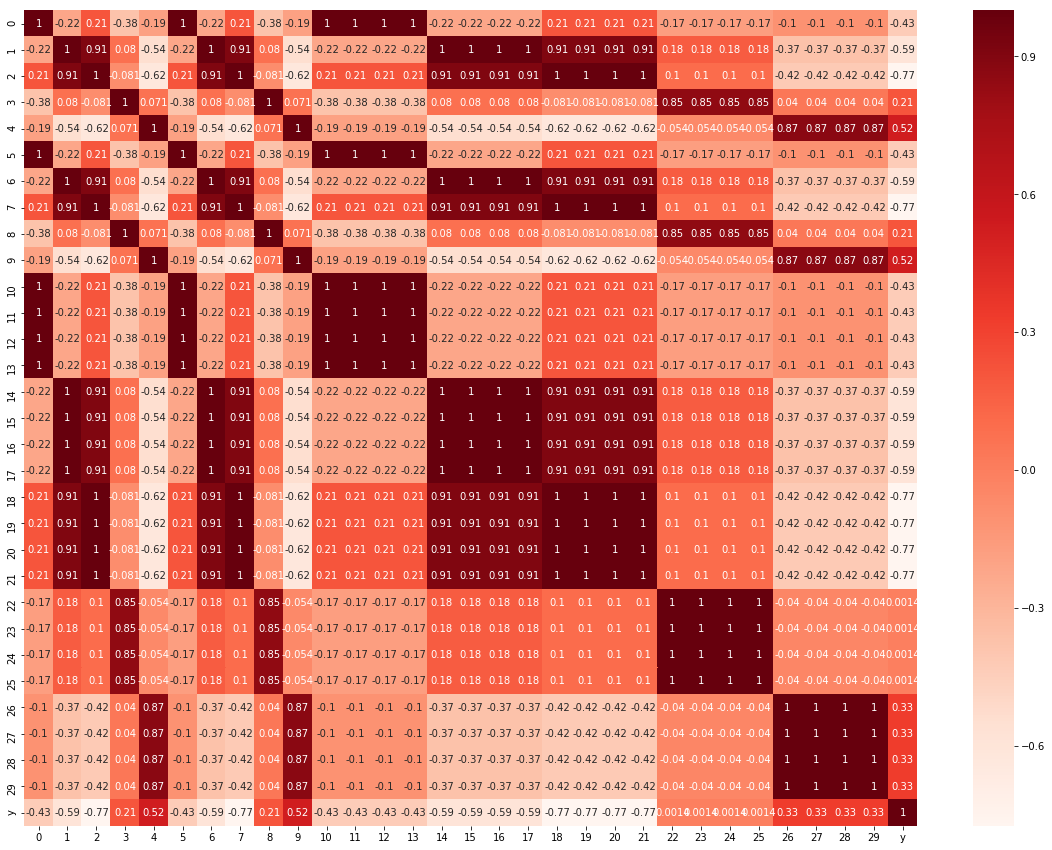

In [18]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

Мы видим
1. 5-9 признаки дублируют 0-4 (корреляция 1) - выкидываем их
2. 10-13 повторяют 0 признак - выкидываем
3. 14-17повторяют 1 признак - выкидываем
4. 18-21 повторяют 2 признак - выкидываем
5. 22-25 повторяют друг друга - оставляем 22 (+проверить связь с 3 признаком)
6. 26-29 повторяют друг друга - оставляем 26 (+проверить связь с 4 признаком)
7. Проверить связь 1 и 2

In [19]:
leave_indices = [0, 1, 2, 3, 4, 22, 26, 'y']

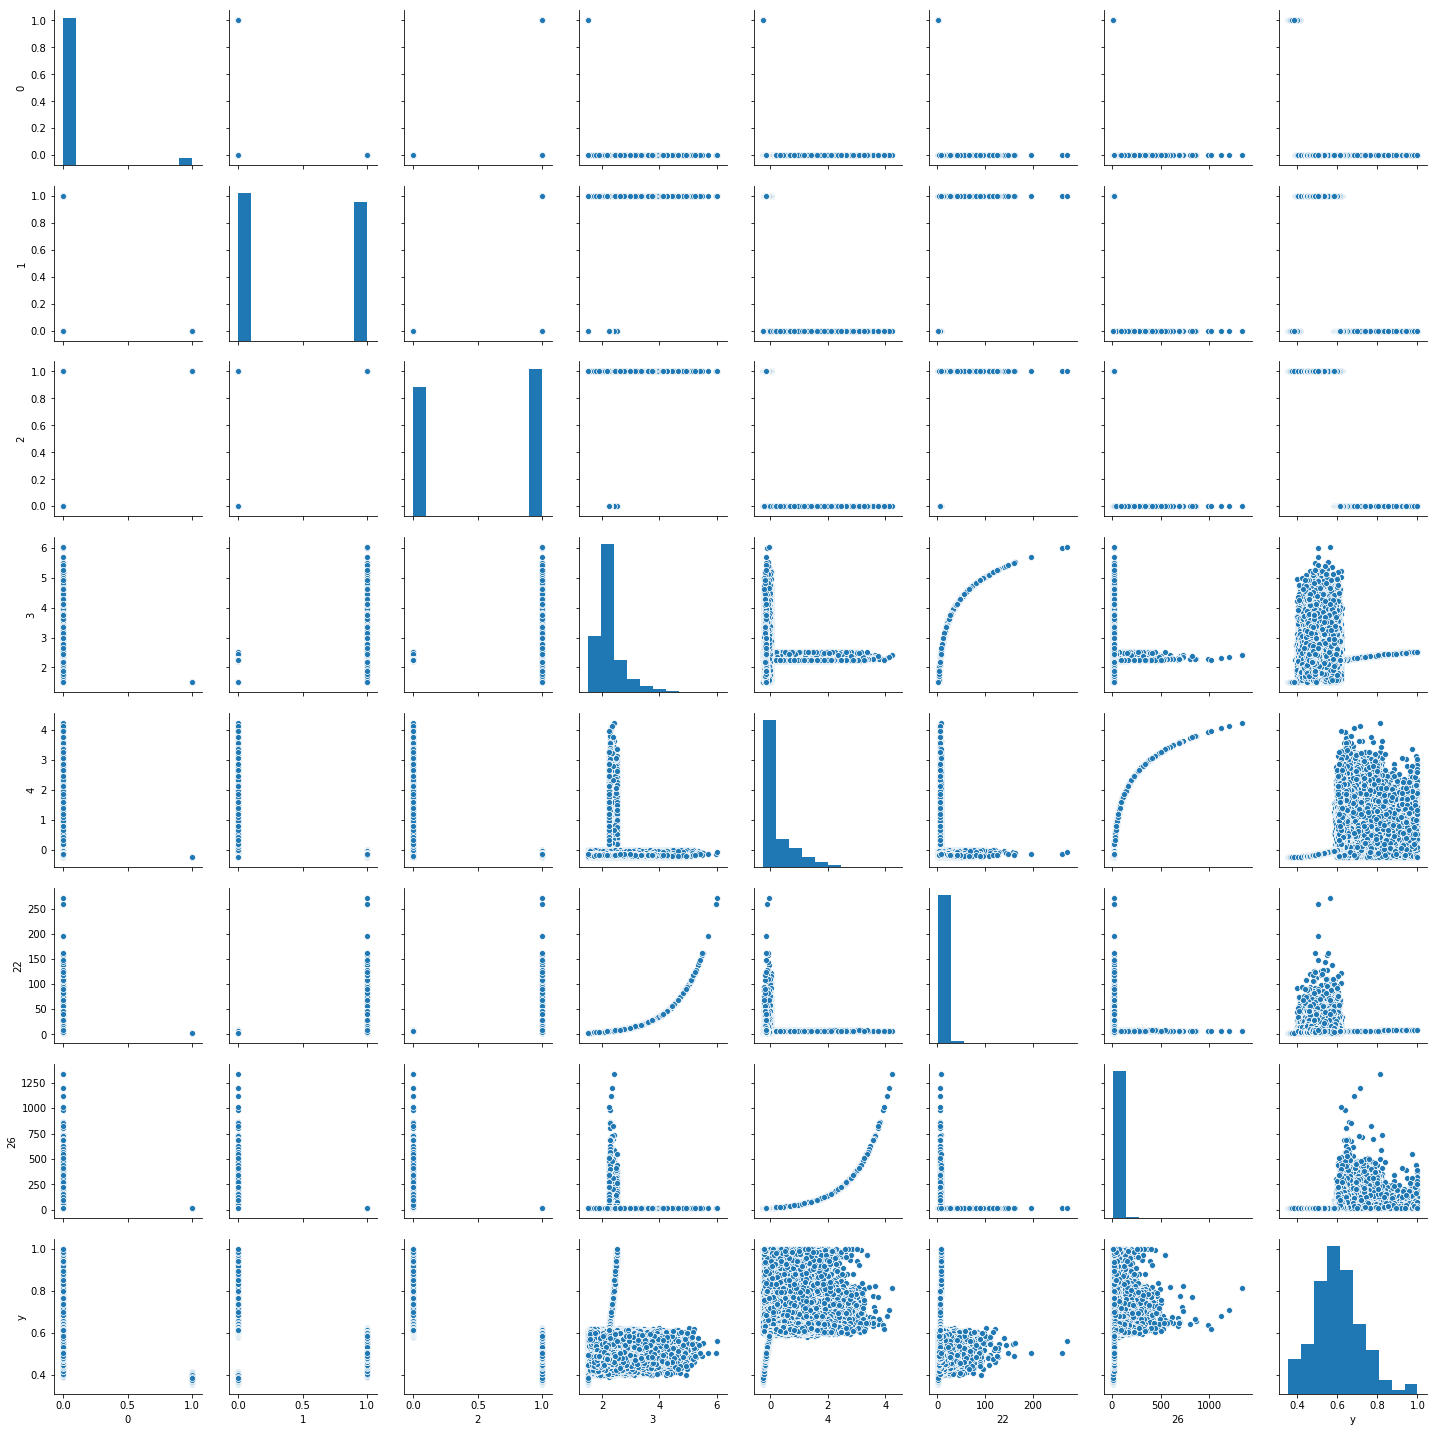

In [20]:
sns.pairplot(train[leave_indices])

In [21]:
(train[2] == train[1]+train[0]).all()

True

Признак 2 является суммой признаков 0 и 1 - выкидываю его

In [22]:
leave_indices = [0, 1, 3, 4, 22, 26, 'y']

Проверим некоторые гипотезы о зависимости признаков, исходя из вида pairplot 

In [23]:
print((train[22] / np.exp(train[3])).unique())

[0.65590616 0.65590616 0.65590616 0.65590616 0.65590616 0.65590616
 0.65590616 0.65590616 0.65590616]


Признак 22 не особо коррелирует с целевой меткой, выражается через признак 3 - выкидываю

In [24]:
print((train[26] / np.exp(train[4])).unique())

[19.31039865 19.31039865 19.31039865 19.31039865 19.31039865 19.31039865
 19.31039865]


Признак 26 выражается через признак 4, но коррелирует сильнее - пока оставлю

In [25]:
leave_indices = [0, 1, 2, 3 ,4, 26, 'y']

Построим простейшую линейную модель.

In [26]:
cleaned_train = pd.DataFrame(train[leave_indices].values, columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f26', 'y'])

In [27]:
from statsmodels.regression.linear_model import OLS

In [28]:
model = OLS.from_formula('y~f0+f1+f3+f4+f26', cleaned_train).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 7.344e+04
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        21:20:10   Log-Likelihood:             2.2512e+05
No. Observations:              172744   AIC:                        -4.502e+05
Df Residuals:                  172738   BIC:                        -4.502e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6666      0.001    714.224      0.000       0.665       0.668
f0            -0.2948      0.001   -330.384      0.000      -0.297      -0.293
f1            -0.1570      0.000   -362.971      0.000      -0.158      -0.156
f3             0.0142      0.000     37.998      0.000       0.014       0.015
f4             0.0266      0.001     35.192      0.000       0.025       0.028
f26           -0.0003   1.16e-05    -27.420      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    41640.570   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127661.981
Skew:                           1.243   Prob(JB):                         0.00
Kurtosis:                       6.399   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Пока что есть смысл оставить признак 26, но коэффициент при нем очень мал.

Добавим межфакторные взаимодействия. Выберем, что добавлять по bic.

In [30]:
import statsmodels.api as sm
features = ['f0', 'f1', 'f3', 'f4','f26']
linear = 'y~'+'+'.join(features)

to_add = []

for i in range(len(features)):
    for j in range(i+1, len(features)):
        new_model = OLS.from_formula(linear+'+'+features[i]+':'+features[j], cleaned_train).fit()
        if new_model.bic < model.bic:
            to_add.append(features[i]+':'+features[j])
        
        

In [31]:
print(to_add)

['f1:f3', 'f1:f4', 'f1:f26', 'f3:f4', 'f3:f26', 'f4:f26']


In [32]:
big_model = OLS.from_formula(linear+'+'+'+'.join(to_add), cleaned_train).fit()

In [33]:
big_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.188e+06
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        21:20:12   Log-Likelihood:             5.5370e+05
No. Observations:              172744   AIC:                        -1.107e+06
Df Residuals:                  172732   BIC:                        -1.107e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1557      0.002  -1214.823      0.000      -2.159      -2.152
f0             0.6614      0.001   1133.738      0.000       0.660       0.663
f1             5.2973      0.019    277.887      0.000       5.260       5.335
f3             1.2317      0.001   1620.531      0.000       1.230       1.233
f4            -0.0015      0.002     -0.664      0.507      -0.006       0.003
f26            0.0001   4.91e-05      2.373      0.018    2.03e-05       0.000
f1:f3         -1.2307      0.001  -1876.224      0.000      -1.232      -1.229
f1:f4          3.0728      0.017    177.028      0.000       3.039       3.107
f1:f26        -0.1320      0.001   -133.802      0.000      -0.134      -0.130
f3:f4          0.0007      0.001      0.735      0.463      -0.001       0.003
f3:f26     -5.075e-05   2.06e-05     -2.465      0.014   -9.11e-05   -1.04e-05
f4:f26     -7.793e-08   3.43e-06     -0.023      0.982   -6.81e-06    6.65e-06
==============================================================================
Omnibus:                    39217.478   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162331.049
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                       7.237   Cond. No.                     1.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
big_model.wald_test('f26=f3:f26=f4:f26=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.30094018]]), p=0.07506448575694678, df_denom=1.73e+05, df_num=3>

In [35]:
big_model.wald_test('f4=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.44078818]]), p=0.5067431642083041, df_denom=1.73e+05, df_num=1>

In [36]:
import statsmodels.formula.api as smf

In [37]:
final_model = OLS.from_formula('y~f0+f1+f3+f1:f3+f1:f4+f1:f26', cleaned_train).fit()

In [38]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.010e+06
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        21:20:12   Log-Likelihood:             5.5369e+05
No. Observations:              172744   AIC:                        -1.107e+06
Df Residuals:                  172737   BIC:                        -1.107e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1516      0.001  -1794.310      0.000      -2.154      -2.149
f0             0.6607      0.000   1548.251      0.000       0.660       0.662
f1             5.2954      0.019    278.129      0.000       5.258       5.333
f3             1.2300      0.001   2380.067      0.000       1.229       1.231
f1:f3         -1.2300      0.001  -2366.010      0.000      -1.231      -1.229
f1:f4          3.0729      0.017    177.052      0.000       3.039       3.107
f1:f26        -0.1320      0.001   -133.803      0.000      -0.134      -0.130
==============================================================================
Omnibus:                    39220.639   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162333.987
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                       7.237   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
final_model.wald_test('f1:f26=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[17903.35466946]]), p=0.0, df_denom=1.73e+05, df_num=1>

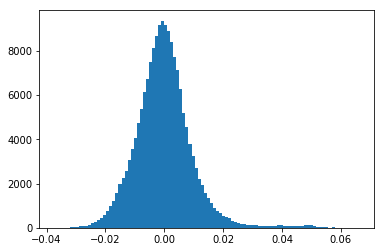

In [40]:
plt.hist(final_model.resid, bins=100)
plt.show()

Проблема с нормальностью ошибки, которая отвергается по критерию Харке-Бера.

Тем не менее, r-squared полностью нас устраивает.

Попробуем как-то проинтерпретировать признаки

In [41]:
leave_features = [0, 1, 3, 4, 26]
columns = ['f0', 'f1', 'f3', 'f4', 'f26']

In [42]:
to_predict = pd.DataFrame(flattened_x_train[:, leave_features], columns=columns)

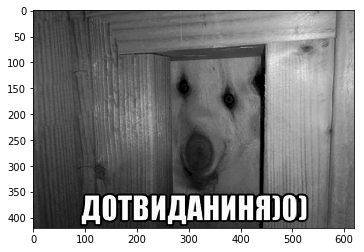

In [43]:
to_predict = pd.DataFrame(flattened_x_test)
for c, d in transform.items():
    to_predict[c] = [d.get(v, float('nan')) for v in to_predict[c]]
named_to_predict = pd.DataFrame(to_predict[leave_features].values, columns=columns)
predicted = final_model.predict(named_to_predict)
plt.imshow(predicted.values.reshape(regression_x_test.shape[:-1]), cmap='gray')
plt.show()

Попробую убрать f26

In [44]:
final_model2 = OLS.from_formula('y~f0+f1+f3+f1:f3+f1:f4', cleaned_train).fit()
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.357e+06
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        21:20:16   Log-Likelihood:             5.4518e+05
No. Observations:              172744   AIC:                        -1.090e+06
Df Residuals:                  172738   BIC:                        -1.090e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1516      0.001  -1707.984      0.000      -2.154      -2.149
f0             0.6607      0.000   1473.764      0.000       0.660       0.662
f1             2.7530      0.001   2170.097      0.000       2.751       2.756
f3             1.2300      0.001   2265.561      0.000       1.229       1.231
f1:f3         -1.2300      0.001  -2252.197      0.000      -1.231      -1.229
f1:f4          0.7517      0.001   1352.966      0.000       0.751       0.753
==============================================================================
Omnibus:                    28506.130   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97110.327
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       6.277   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

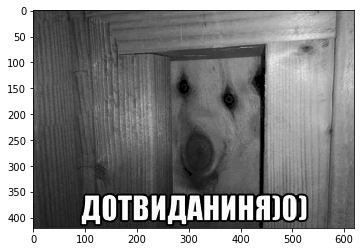

In [45]:
predicted = final_model2.predict(named_to_predict)
plt.imshow(predicted.values.reshape(regression_x_test.shape[:-1]), cmap='gray')

 Тоже неплохо!

Интерпретация

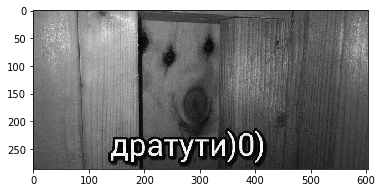

f0


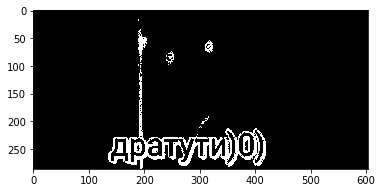

f1


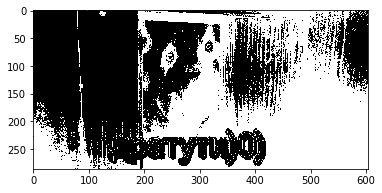

f3


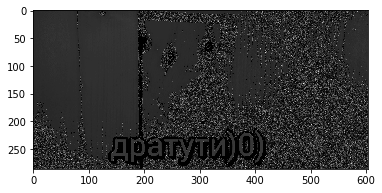

f4


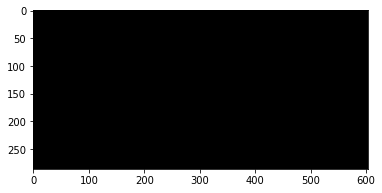

f26


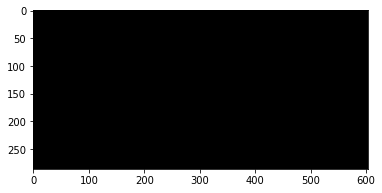

In [46]:
plt.imshow(regression_y_train, cmap='gray')
plt.show()
for column in columns:
    print(column)
    to_predict = pd.DataFrame(flattened_x_train)
    for c, d in transform.items():
        to_predict[c] = [d.get(v, float('nan')) for v in to_predict[c]]
    named_to_predict = pd.DataFrame(to_predict[leave_features].values, columns=columns)
    named_to_predict1 = pd.DataFrame(np.zeros_like(named_to_predict.values), columns=columns)
    named_to_predict1[column] = named_to_predict[column]
    predicted = final_model.predict(named_to_predict1)
    plt.imshow(predicted.values.reshape(image_size), cmap='gray')
    plt.show()

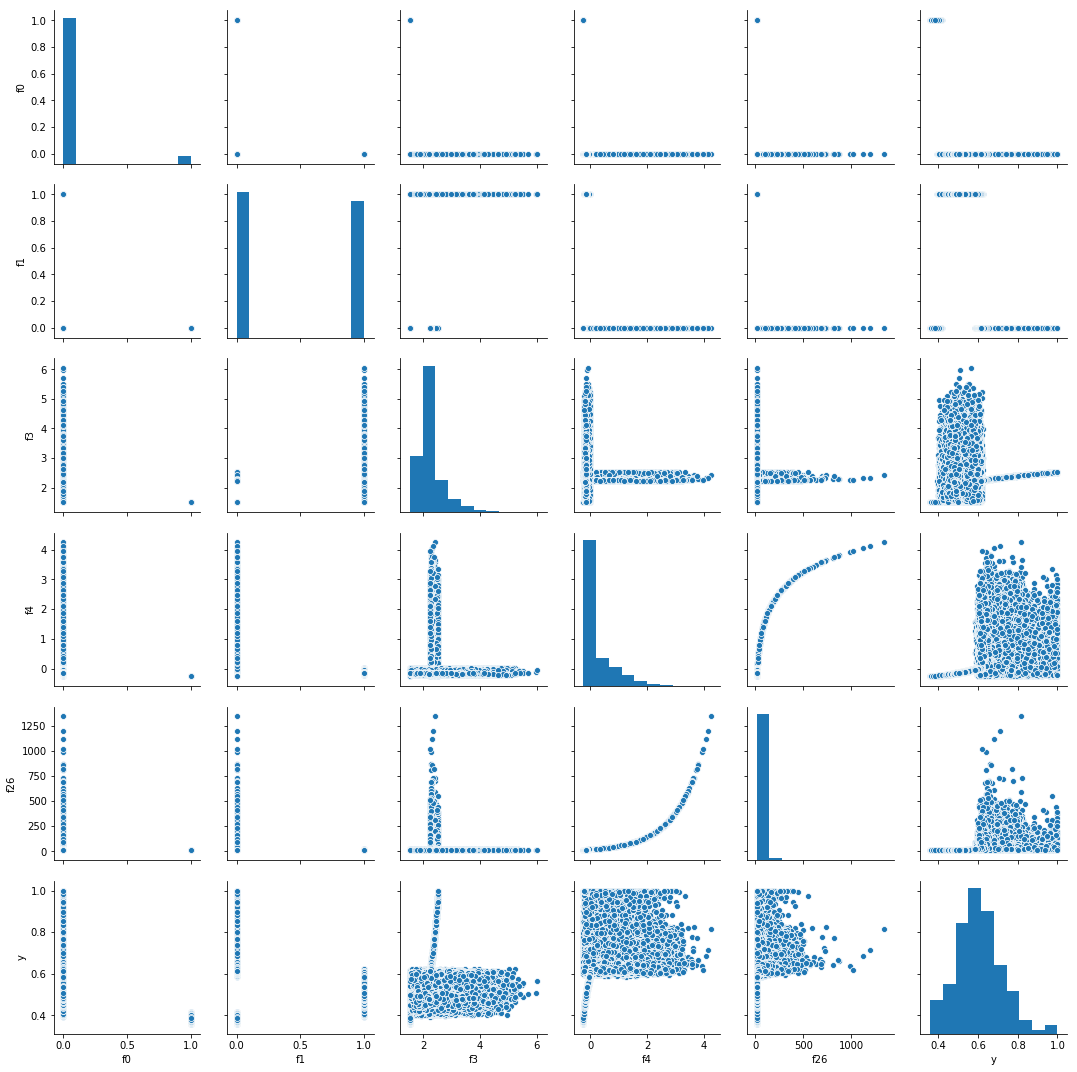

In [47]:
sns.pairplot(cleaned_train[columns+['y']])

* 'f0' - черные, самые мемные части картинки.
* 'f1' - какая-то деревянная структура
* 'f3' - какая-нибудь контрастность
* 'f4' - даже не знаю, но оно работает только в совокупности с другими признаками, там облако какое-то

P.S. Есть один нюанс, что в тестовой выборке признак 2 != признак 0 + признак 1